# Question 1: Gaussian Processes and Hyper Parameter Tuning

Show that the posterior distribution isP(y?|X?,X,y) =Ny?(μ,Σ), whereμ=k(X?,X)k(X,X)−1yand  Σ  =k(X?,X)−k(X?,X)k(X,X)−1k(X,X?). 


In [ ]:
# See PDF

Implement [K]= RBF Kernel(X1,X2,sigma,h) which takes as input two matrices of examplesX1(n1×D),X2(n2×D) with hyperparametersσ,h, and outputs the kernel matrix whereKi,j=k(X1i,X2j), where k is the RBF function described above.  Bonus:  do this without any for loops.

In [ ]:
import numpy as np

def rbfKernel(X1, X2, sigma=1.0, h=1.0):
  mat1 = np.sum(X1**2,1).reshape(-1,1)
  mat2 = np.sum(X2**2, 1) 
  squareDistance = mat1 + mat2 - 2 * np.dot(X1, X2.T)
  kernalMat = sigma**2 * np.exp(-0.5 / h**2 * squareDistance)
  return kernalMat
#test function
# X = np.arange(-5, 5, 0.2).reshape(-1, 1)
# mu = np.zeros(X.shape)
# cov = rbfKernel(X, X)

Implement [GPMean, GPVariance] = GPRegression(XTrain, yTrain, XTest, sigma, h) whichcarries out the Gaussian Process regression and returns the estimated mean and variances for thevariables in XTest.  See page 19 of chapter 2 in Rasmussen and Williams for help on making thiscomputationally efficient and numerically stable.

In [ ]:
from numpy.linalg import inv
def GPRegression(XTrain, yTrain, XTest, sigma = 1.0, h=1.0):
  s2 = 1e-8
  kernel1 = kernel(XTrain, XTrain,sigma, h) + s2**2 * np.eye(len(XTrain))
  kernel2 = kernel(XTrain, XTest, sigma, h)
  kernel3 = kernel(XTest, XTest, sigma, h) + 1e-8 * np.eye(len(XTest))
  kernel4 = inv(kernel1) 

  GPM = kernel2.T.dot(kernel4).dot(yTrain)
  GPV = kernel3 - kernel2.T.dot(kernel4).dot(kernel2)
  
  return GPM, GPV
#Test function
# X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
# Y_train = np.sin(X_train)

# mu_s, cov_s = GPRegression(X_train, Y_train, X)


In this step, you need to find hyperparameters for the Gaussian Process.  One reasonable methodfor Gaussian processes is to choose parameters that maximizes the log marginal likelihood.  First implement [logml]= LogMarinalLikelihood(XTrain, yTrain, sigma, h) which computes the logmarginal likelihood of the training data given the parameters

In [ ]:
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

def ls(a, b):
            return lstsq(a, b, rcond=-1)[0]

def LogMarinalLikelihood(XTrain, yTrain, sigma, h):
  noise = 0.4
  kernel1 = rbfKernel(XTrain,XTrain, sigma,h)  +\
            noise**2 * np.eye(len(XTrain))
  L = cholesky(kernel1)
  return np.sum(np.log(np.diagonal(L))) + \
               0.5 * yTrain.dot(ls(L.T, ls(L, yTrain))) + \
               0.5 * len(XTrain) * np.log(2*np.pi)
# Test not working
# lml = LogMarinalLikelihood(X_train, Y_train, 1.0, 1e-5)

ValueError: ignored

Implement [h, sigma]= HyperParameters(XTrain, yTrain, hs, sigmas), which does a grid searchacross the parameters in hs, sigmas and returns the combination that minimizes the log marginallikelihood (here you can just call the grid search function provided by Python).

In [ ]:
from sklearn.model_selection import GridSearchCV
def HyperParameters(XTrain, yTrain, hs, sigmas):
  return GridSearchCV(LogMarinalLikelihood, )


Run  your  Gaussian  process  regression  method  on  the  dataset  provided.   Compare  and  reportyour  results  with  a  naive  mean  prediction.   Get  your  hyperparameters  by  using  your  imple-mented  HyperParameters  functions  and  searching  over  the  space  of  hs  =  logspace(-1,1,10)’?norm(std(XTrain)) and sigmas = logspace(-1,1,10)’?std(yTrain).


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd

hs = [-1,1,10]
s = [-1,1,10]

# parameters = {'hs':(hs), 'sigmas':(sigmas)}

# hyperparams = HyperParameters()

df = pd.read_excel (r'/content/Concrete_Data.xls')
y = df['Concrete compressive strength(MPa, megapascals) ']
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])

XTrain, XTest, YTrain, YTest = train_test_split(X,y, test_size=0.1, random_state=42)


# Question 2: Decision Trees

Consider the problem of predicting if a person has a college degree based on age and salary.  The tableand graph below contain training data for 10 individuals. Now build a decision tree for classifying whether a person has a college degree by greedily choosing threshold splits that maximize informationgain.  What is the depth of your tree and the information gain at each split?

In [ ]:
# See PDF

A  multivariate  decision  tree  is  a  generalization  of  univariate  decision  trees,  where  more  than  one attribute can be used in the decision rule for each split.  That is, splits need not be orthogonal to a feature’s axis. For the same data, learn a multivariate decision tree where each decision rule is a linear classifier thatmakes decisions based on the sign of α x age +β x income−1.  Draw your tree, including the α,β and theinformation gain for each split.

In [ ]:
# See PDF

Multivariate decision trees have practical advantages and disadvantage.  List advantages and disadvantages you can think of when comparing multivariate decision trees to univariate decision trees.

In [ ]:
# Advantages:
# Multivariate decision trees tend to have a lower depth than univariate decision trees
# Multivariate DTs allow for more complex branching as they can branch on a combination of features rather than just one
# Disadvantages
# Hyperplanes with an arbitrary orientation are used in multivariate trees which means there are 2^d (N/d) possible hyperplanes where d is the dimensions and n is the number 
# of thresholds at each split point. Becuase of this large number of hyperplanes, search becomes inefficient on these trees
# Multivariate DTs don't work as well with discrete value features
# Multivariate DTs are harder to find because you have to use a regression to find the decision boundries which can be expensive in terms of time/space complexity

# Question 3: Binary Trees

How many unique, perfect binary trees of depth 3 can be drawn if we have 5 attributes.  By depth, wemean depth of the splits, not including the nodes that only contain a label.  So a tree that checks justone attribute is a depth 1 tree.  By perfect binary tree, we mean every node has either 0 or 2 children,and every leaf is at the same depth.  Note also that a tree with the same attributes but organized atdifferent depths are considered ”unique”.  Do not include trees that test the same attribute along thesame path in the tree.

[Text(186.0, 190.26, 'X[1] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(74.4, 81.53999999999999, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 27.180000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(148.8, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(260.40000000000003, 135.9, 'X[0] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(223.20000000000002, 81.53999999999999, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(186.0, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(260.40000000000003, 27.180000000000007, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(297.6, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

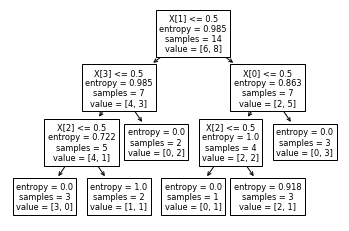

In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
x = [['E', 'F', 'S', 'L', 'LJ', 'A'],
     [1,1,0,0,1,1],
     [1,1,1,0,1,1],
     [0,0,1,0,0,0],
     [0,1,1,0,1,0],
     [0,1,1,0,0,1],
     [0,0,1,1,1,1],
     [1,0,0,0,1,0],
     [0,1,0,1,1,1],
     [0,0,1,0,1,1],
     [1,0,0,0,0,0],
     [1,1,1,0,0,1],
     [0,1,1,1,1,0],
     [0,0,0,0,1,0],
     [1,0,0,1,0,1]]
X = pd.DataFrame(x)
X.columns = X.iloc[0]
X = X[1:]
Y = X['A']
Y = Y.astype('int')
features = list(X.columns[:5])
X = X[features]
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = clf.fit(X, Y)
tree.plot_tree(model)

In  general,  for  a  problem  with  A  attributes,  how  many  unique  full  D  depth  trees  can  be  drawn?Assume A>>D

In [ ]:
# See PDF

Consider  the  following  dataset  for  this  problem.   Given  the  five  attributes  on  the  left,  we  want  topredict if the student got an A in the course. Change the decision tree you just implemented for this dataset.  For the first one, only go to the depth 1.  For the second one go to depth 2.  For these two trees, use the entropy algorithm.  For each nodeof the tree, show the decision, the number of positive and negative examples and show the entropy atthat node.

In [ ]:
# See PDF

Make one more decision tree.  Use the same procedure as in (b),  but make it depth 3.  Now,  giventhese three trees, which would you prefer if you wanted to predict the grades of 10 new students whoare not included in this dataset?  Justify your choice.

In [ ]:
# See PDF

Recall the definition of the ”realizable case.” For some fixed concept class C, such as decision trees,a  realizable  case  is one  where  the  algorithm gets  a  sample  consistent  with  some  concept c∈C.  Inother words,  for decision trees,  a case is realizable if there is some tree that perfectly classifies the dataset.  If the number of attributes A is sufficiently large, under what condition would a dataset notbe realizable for decision trees of no fixed depth?  Prove that the dataset is unrealizable if and only ifthat condition is true.

In [ ]:
# See PDF